<a href="https://colab.research.google.com/github/vbwanere/py_m_Projects/blob/Main_Penn/ML/Clustering/Kmeans_GMM_WS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **K-Means Clustering and Gaussian Mixture Models**
- **Reference:**
<ul>
<li>https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
<li>https://medium.com/swlh/gaussian-mixture-models-gmm-1327a2a62a
</ul>


- **Objectives:** The objective of this notebook is to walk through a working example of K-means clustering algorithm. In doing so, we will see how the algorithm will change from changing hyper-parameters. We can also observe K-means' shortcomings and how more generalized approaches (GMM) may lead to performance benefits.



## **K-Means**

In [2]:
import random
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from numpy.linalg import *
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

First, let's create a toy dataset. Because K-means is an unsupervised algorithm, in application, we probably wouldn't know the true y's of the dataset that we're running the algorithm on.

In [ ]:
X, y = make_blobs(
   n_samples=400, n_features=2,
   centers=4, cluster_std=1,
   shuffle=True, random_state=53
)

How does this data set look? Let's take a look at the clusters.

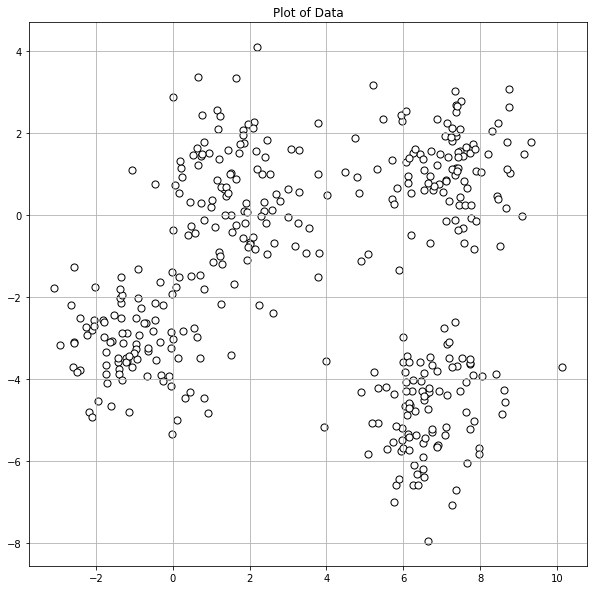

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.title('Plot of Data')
plt.grid()
plt.show()

In this worksheet, we will use scikit-learn's k-means clustering algorithm as as "black box" implementation.

In [ ]:
# The number of clusters to form as well as the number of centroids to generate.
num_clusters = 4

# Maximum number of iterations of the k-means algorithm for a single run.
max_iter = 300

#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
n_runs = 10

kmeans = KMeans(
    n_clusters=num_clusters, init='random',
    n_init=n_runs, max_iter=max_iter,
    tol=1e-04, random_state=0
)

y_pred_km = kmeans.fit_predict(X)

Let's see how the algorithm did by plotting the clusters. What do you expect to be the boundaries of the three clusters? How about the centroids for each cluster?

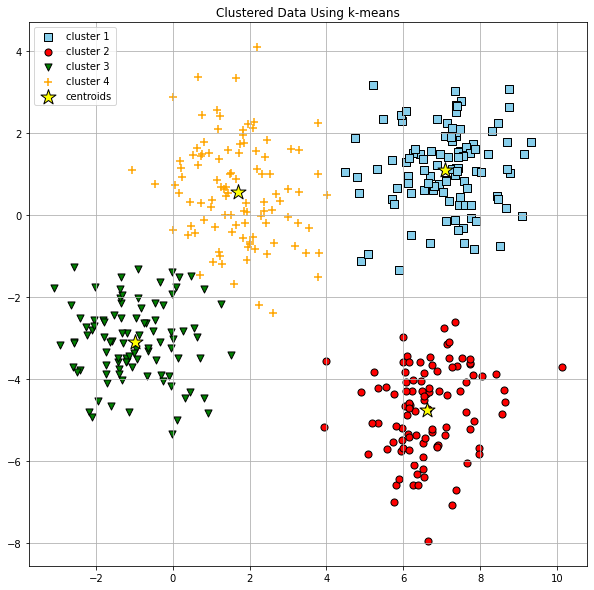

In [ ]:
plt.figure(figsize=(10,10))

# plot cluster 1
plt.scatter(
    X[y_pred_km == 0, 0], X[y_pred_km == 0, 1],
    s=50, c='skyblue',
    marker='s', edgecolor='black',
    label='cluster 1'
)

# plot cluster 2
plt.scatter(
    X[y_pred_km == 1, 0], X[y_pred_km == 1, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot cluster 3
plt.scatter(
    X[y_pred_km == 2, 0], X[y_pred_km == 2, 1],
    s=50, c='green',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot cluster 4
plt.scatter(
    X[y_pred_km == 3, 0], X[y_pred_km == 3, 1],
    s=50, c='orange',
    marker='+', edgecolor='black',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.title('Clustered Data Using k-means')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

We can measure the performance of the k-means algorithm using the sum of squared distances of samples to their closest cluster center. This is also known as *distortion*.

In [ ]:
print("distortion = " + str(kmeans.inertia_))

distortion = 858.5448976677328


But does distortion precisely measure the performance of the k-means algorithm? How would our distortion have changed if we used $k=5$, instead of $k=4$? Do you think that the distortion would increase or decrease?

Let's rerun our code above with $k=5$ and find out.

In [ ]:
# The number of clusters to form as well as the number of centroids to generate.
num_clusters = 5

# Maximum number of iterations of the k-means algorithm for a single run.
max_iter = 300

#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
n_runs = 10

kmeans = KMeans(
    n_clusters=num_clusters, init='random',
    n_init=n_runs, max_iter=max_iter,
    tol=1e-04, random_state=0
)

y_pred_km = kmeans.fit_predict(X)

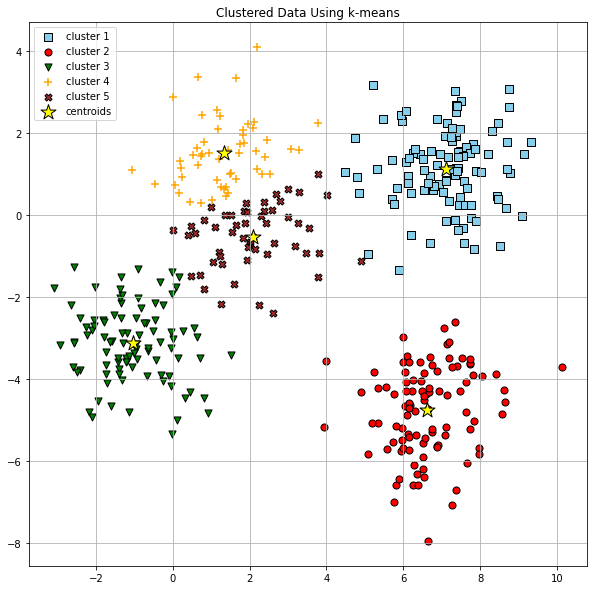

In [ ]:
plt.figure(figsize=(10,10))

# plot cluster 1
plt.scatter(
    X[y_pred_km == 0, 0], X[y_pred_km == 0, 1],
    s=50, c='skyblue',
    marker='s', edgecolor='black',
    label='cluster 1'
)

# plot cluster 2
plt.scatter(
    X[y_pred_km == 1, 0], X[y_pred_km == 1, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot cluster 3
plt.scatter(
    X[y_pred_km == 2, 0], X[y_pred_km == 2, 1],
    s=50, c='green',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot cluster 4
plt.scatter(
    X[y_pred_km == 3, 0], X[y_pred_km == 3, 1],
    s=50, c='orange',
    marker='+', edgecolor='black',
    label='cluster 4'
)

# plot cluster 5
plt.scatter(
    X[y_pred_km == 4, 0], X[y_pred_km == 4, 1],
    s=50, c='brown',
    marker='X', edgecolor='black',
    label='cluster 5'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.title('Clustered Data Using k-means')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
print("distortion = " + str(kmeans.inertia_))

distortion = 739.2432275501335


What did you get for the distortion when k=4 and k=5? Report each below.



In [ ]:
# question: what are distortions when k = 4 and k = 5?
distrotion_4 = 858.54
distrotion_5 = 739.24

In [ ]:
# Maximum number of iterations of the k-means algorithm for a single run.
max_iter = 300

#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
n_runs = 10

distortions = []

for num_clusters in range(1,20):
    kmeans = KMeans(
        n_clusters=num_clusters, init='random',
        n_init=n_runs, max_iter=max_iter,
        tol=1e-04, random_state=0
    )

    kmeans = kmeans.fit(X)
    distortions.append(kmeans.inertia_)


Text(0.5, 0, 'k parameter')

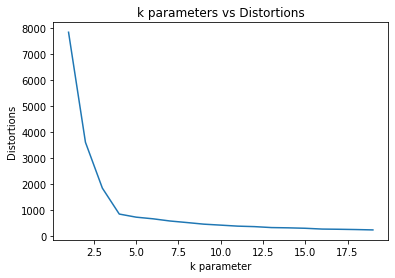

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,20,1),distortions)
plt.title("k parameters vs Distortions")
plt.ylabel("Distortions")
plt.xlabel("k parameter")

## **Gaussian Mixture Models**

Now, let's remove our assumption of identical variances and see how this algorithm performs.

In [ ]:
X, y = make_blobs(
   n_samples=400, n_features=2,
   centers=4, cluster_std=[(.25, 1), (.5, .75), (1.5, .5), (0.75, 1.25)],
   shuffle=True, random_state=53
)

How does this data set look? Let's take a look at the clusters.

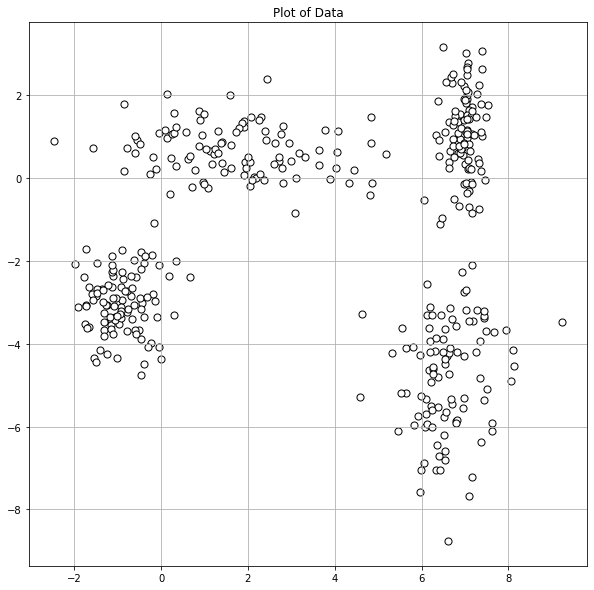

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.title('Plot of Data')
plt.grid()
plt.show()

First of all, let's run the k-means algorithm.

In [ ]:
# The number of clusters to form as well as the number of centroids to generate.
num_clusters = 4

# Maximum number of iterations of the k-means algorithm for a single run.
max_iter = 300

#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
n_runs = 10

kmeans = KMeans(
    n_clusters=num_clusters, init='random',
    n_init=n_runs, max_iter=max_iter,
    tol=1e-04, random_state=0
)

y_pred_km = kmeans.fit_predict(X)

Here, we use the similar method to visualize the clustering result.

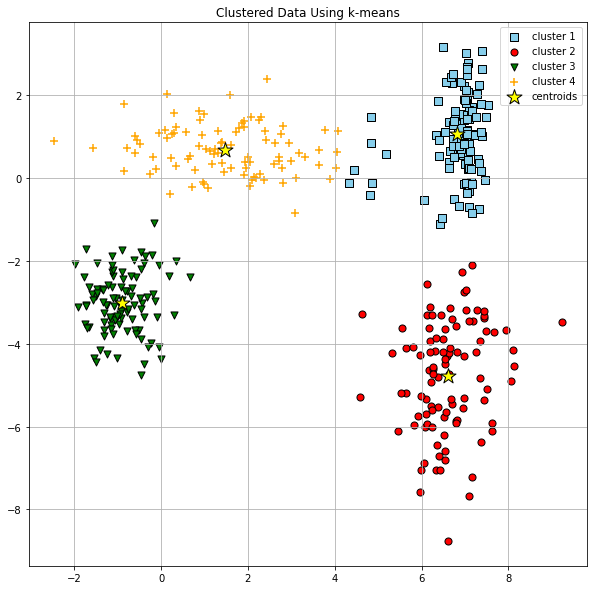

In [ ]:
plt.figure(figsize=(10,10))

# plot cluster 1
plt.scatter(
    X[y_pred_km == 0, 0], X[y_pred_km == 0, 1],
    s=50, c='skyblue',
    marker='s', edgecolor='black',
    label='cluster 1'
)

# plot cluster 2
plt.scatter(
    X[y_pred_km == 1, 0], X[y_pred_km == 1, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot cluster 3
plt.scatter(
    X[y_pred_km == 2, 0], X[y_pred_km == 2, 1],
    s=50, c='green',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot cluster 4
plt.scatter(
    X[y_pred_km == 3, 0], X[y_pred_km == 3, 1],
    s=50, c='orange',
    marker='+', edgecolor='black',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.title('Clustered Data Using k-means')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Not bad, but clearly the k-means's assumption that the variances are equal (and as a result, creating spherical boundaries) seems to be negatively impacting the clustering. One cluster seems to be eating into the boundary of another.

To adjust for theses differences in variances, it will be necessary to remove this assumption. This paves the way for Guassian Mixture Models!



With GMM, we allow the samples to have different probabilities from being in different clusters $p(z_i = k)$, allow different probabilities of drawing from different clusters $\pi_k$, and allow the estimation of the entire covariance matrix $\Sigma_k$.

As stated in lecture, the goal is to estimate the parameters of the mixture $(\pi_k, \mu_k, \Sigma_k)$ for all $k = 1, ...,K$, using maximum liklihood estimation (or MAP).

$$\log P(D \mid \pi,\mu,\Sigma) = \sum_i \log \sum_k p_\pi(z_i=k) p_{\mu,\Sigma}(\mathbf{x}_i\mid z_i=k)$$

In [ ]:
# The number of clusters to form as well as the number of centroids to generate.
num_clusters = 4

# Maximum number of iterations of the k-means algorithm for a single run.
max_iter = 300

#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
n_runs = 10

GMM = GaussianMixture(
    n_components=num_clusters,
    n_init=n_runs, max_iter=max_iter,
    tol=1e-04, random_state=0
)

y_pred_gmm = GMM.fit_predict(X)

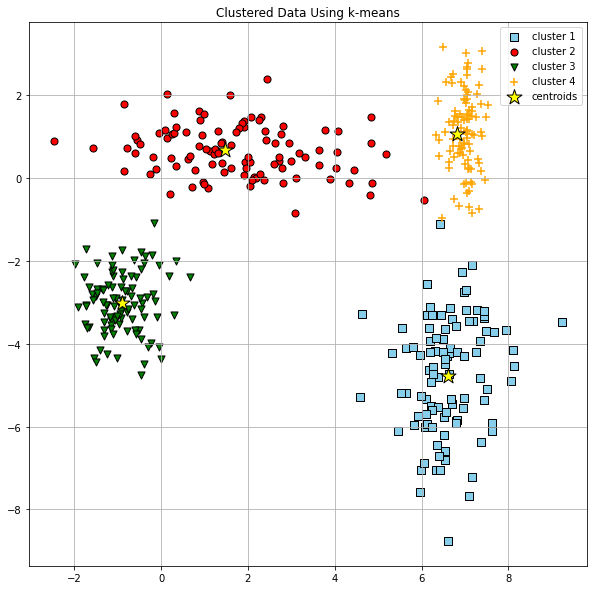

In [ ]:
plt.figure(figsize=(10,10))

# plot cluster 1
plt.scatter(
    X[y_pred_gmm == 0, 0], X[y_pred_gmm == 0, 1],
    s=50, c='skyblue',
    marker='s', edgecolor='black',
    label='cluster 1'
)

# plot cluster 2
plt.scatter(
    X[y_pred_gmm == 1, 0], X[y_pred_gmm == 1, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot cluster 3
plt.scatter(
    X[y_pred_gmm == 2, 0], X[y_pred_gmm == 2, 1],
    s=50, c='green',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot cluster 4
plt.scatter(
    X[y_pred_gmm == 3, 0], X[y_pred_gmm == 3, 1],
    s=50, c='orange',
    marker='+', edgecolor='black',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.title('Clustered Data Using k-means')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

This is the end!